## 0.Intro  
  
### 어떤 주식을 사야할까?  
안정적인 성향의 나는 수익이 적더라도 안정적으로 오랫동안 '투자'목적으로 가지고 있을 만한 주식을 원한다. 그렇다면 어떤 주식을 사야할까? 아직 주식 초보인 내가 가장 단순하게 매수 결정 기준으로 삼을 수 있는건 주식 가격이다. 따라서 주식 가격 데이터만 가지고 매수 판단을 하려 한다. 일단 주식 가격만으로 내가 알 수 있는 정보는 무엇일까? 
   
### 주식가격으로 뽑아낼 수 있는 지표는 다음과 같다 : 
1) 주가 변동성  
2) 최대/최소 주가  
3) 주가 흐름 (+)/(-)  
    
### 이 중 어떤 지표가 가장 중요할까?  
개인적으로 꼽으라면 <b>'주가 변동성' </b> 같다. 왜냐하면  
1) 먼저 주식 가격이나 가격의 흐름은 거의 예측불가라 신뢰성있는 지표가 아닌 듯 하다. 개인적으로 주식 시장은 비효율적이고 주관적인 요인에 너무 큰 영향을 미치기에 주식 가격과 흐름을 보는 것은 의미가 없다고 생각한다.  
2) 또한 '투자 수익'은 크게 기업의 안정성과 잠재성으로 결정되는데, 이 중에서 기업의 안정성은 과거의 행적으로 판단할 수 있기에 언제든 변할 수 있는 잠재성보다 더 신뢰성 있는 지표로 보인다. 따라서 과거의 행적과 관련된 주가 변동성을 보는게 타당하다는 결론이다. 
    
  
### 그럼 일단 가설을 세워보기 전에 데이터부터 적절한지 확인해봐야겠다.   
  ------------------------------------------------------------------------------------------

## 1.  데이터 추출하고 살펴보기 

### 1.1 데이터 추출
- 데이터는 2018/6~2020/9월까지의 주식 가격이다.  
- 회사별 종목코드가 있고 날짜는 (당연히) 평일만 포함되어 있다. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('/Users/Ahra/Downloads/prepass/stock.csv')

In [3]:
data.head(5)

,Symbol,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,...,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18
0,A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,...,25550.0,23650.0,24550.0,25950.0,26750.0,26300.0,25400.0,25050.0,25300.0,25050.0
1,A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
2,A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,...,980.0,932.0,741.0,875.0,840.0,860.0,833.0,817.0,812.0,796.0
3,A000050,13200.0,13550.0,13600.0,13800.0,13800.0,13800.0,13650.0,13850.0,14500.0,...,11100.0,11350.0,11550.0,11500.0,11550.0,11300.0,11300.0,11050.0,10900.0,10750.0
4,A000060,20050.0,20050.0,20150.0,20050.0,20400.0,20150.0,20700.0,20950.0,20150.0,...,12700.0,12700.0,12650.0,12700.0,12800.0,13000.0,13200.0,13150.0,13150.0,13200.0


### 1.2. 데이터 간단히 살펴보기 

### 1.2.1 중복된 종목이 있는지 확인하기  
없음  

In [4]:
display(data.shape)
display(data['Symbol'].value_counts().sum())

(2274, 569)

2274

### 1.2.2 날짜 컬럼 확인하기  
- 주말 제외한 평일 날짜만 포함됨  
- 드문드문 날짜가 빠져있음 -> 확인 필요 
- 연도별로 컬럼 분리하여 리스트로 생성 : col_2018, col_2019, col_2020  
  
- 2018 : 3,4분기  
- 2019 : 1~4분기  
- 2020 : 1~3분기 

In [5]:
col_num = data.columns.value_counts().sum() 
col_list = []
col_2018 = []
col_2019 = []
col_2020 = []

for i in range(1, col_num): 
    col_list.append(data.columns[i])

# print(col_list)

for col in col_list : 
    if col.find('2018') == 0 :
        col_2018.append(col)
    elif col.find('2019') == 0:
        col_2019.append(col)
    else :
        col_2020.append(col)
        
# print(col_2020)

### 1.2.3 missing values 확인하기
- 마지막 날짜 기준 총 2274개의 상장기업 
- 주식가격은 상장일에 따라 상장일 전은 모두 NaN으로 표기됨. 
- NaN 은 0으로 처리.(상장하면 주가가 0이 될리 없으므로 0으로 처리해도 무방하다는 판단) 

In [6]:
data.count()

Symbol        2274
2018-06-01    1996
2018-06-04    2001
2018-06-05    2001
2018-06-07    2003
              ... 
2020-09-14    2268
2020-09-15    2268
2020-09-16    2269
2020-09-17    2272
2020-09-18    2274
Length: 569, dtype: int64

### 주어진 데이터에서 알 수 있는 정보는 회사의 단축코드, 날짜, 주식가격 이다.  
내 관심은 '주가 변동성'이므로 주식가격을 통해 파악할 수 있을 것이다. 여기에 날짜 정보까지 더하면 일정 기간 동안의 주가 변동성도 파악이 가능하다.  
그럼 우선은 주가 변동성이라는 새로운 컬럼을 만들어야겠다. 

## 2. 주가 변동성 
<b> :y: 주가 변동성  :: </b> 
- 안정적인 회사일수록 낮음.  
- 기업 품질에 대한 정보. 그렇다고 해서 꼭 높은 수익을 보이는 건 아님.  
- 즉 주가변동성은 위험의 척도가 아니라 품질의 척도임  

- 7일기준으로 주가 변동성을 측정한다고 가정시, 
> :: 평균변동폭 - 7일간 변동금액 / (7일-1)  
> :: 변동비율 - 7일간 평균주가 / 7일간 평균변동폭  
> :: 변동성 범위에서 움직일 확률 :  
> (전체 변동성 기준 날짜 수(7일-1) - 변동폭에서 벗어난 날짜 수) / 전체 변동성 기준 날짜 수(7일 -1)  
  
### 우선 주어진 기간 전체 '주가변동률'을 추출해보고 시각화해서 살펴보자

In [7]:
#총 열의 갯수 
col_num = data.shape[1]

# 각 회사의 상장일수 
result=[]
row=data.shape[0]
for i in range(0, row) : 
    days = data.iloc[i, :].count()
    result.append(days)

data['days']=result


# 변동금액 합계 구하기 위해서 NaN -> 0으로 
data.fillna(0, inplace=True)

#변동폭 구하기 
total = 0
result=0
for i in range(1, col_num-1): 
    result=data.iloc[:, i+1]-data.iloc[:, i]
    total+=result 

#전체 변동금액 총합 
data['diff_gap_sum'] = total

#변동폭 
data['diff_gap'] = data['diff_gap_sum']/(data['days']-1)

#전체기간동안 주가 합계 
temp=data.iloc[:, 1:-3].sum(axis=1)
data['price_sum']=temp

#변동율
data['diff_rate']=(data['price_sum']/data['days'])/data['diff_gap']

#0/0 = inf값이 나올 수 있으므로 0으로  
from numpy import inf
import numpy as np 
data.replace([np.inf, -np.inf],0, inplace=True)

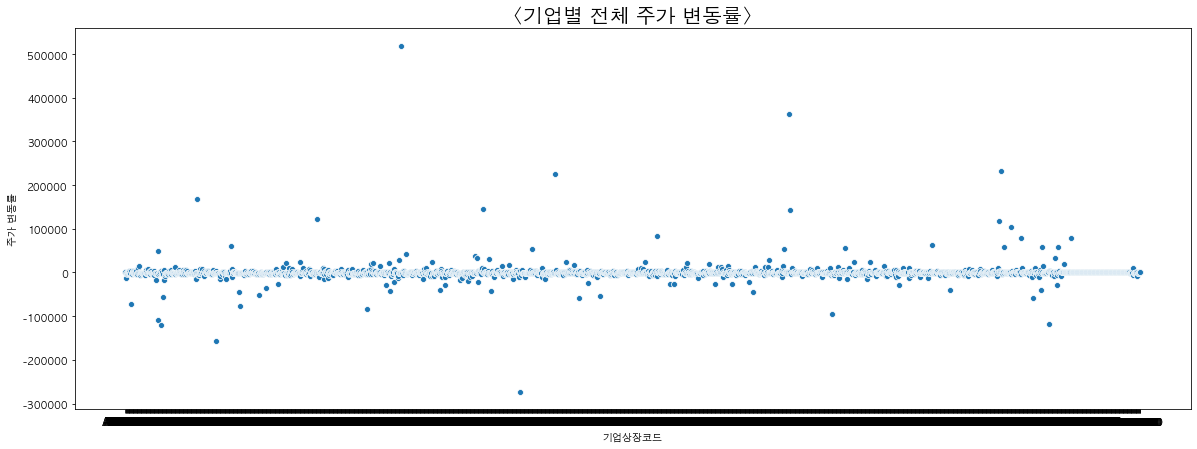

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


fig, ax = plt.subplots(1,1,figsize=(20,7))
sns.scatterplot(data=data, x=data.Symbol, y=data.diff_rate)
ax.set_title('<기업별 전체 주가 변동률>', fontsize=20)
ax.set(xlabel='기업상장코드', ylabel='주가 변동률')

plt.show()

### 그림을 보면 주가 변동률이 거의 없는(0에 가까운) 기업이 있는 반면 그렇지 않은 기업도 있음을 알 수 있다.   
  
그럼 기업별 주가변동률 차이를 보는 것도 재밌을 것 같다. 주가 변동률이 기업 안전성을 대변하는 점을 생각해볼 때, 어떤 기업일수록 주가 변동률이 낮은걸까? 일단 상장코드가 빠른 기업들 중에서도 주가 변동률이 큰 기업들이 있는걸 보면 오래된 기업이라고 해서 주가 변동률이 낮은 것은 아닌 듯 하다. 그렇담 설립일자 말고 내가 이 데이터에서 얻을 수 있는 추가적인 기업 정보가 있을까? 

### 2.2 기업정보 - by 상장코드  
  
1)상장코드, 2)날짜 정보를 활용하여 추가적인 기업 정보를 추출해보자. 
  
**<상장코드>**
1. 설립일 : 알파벳과 끝 0을 뺀 나머지 숫자  
> - 등록순서 의미  
> - 나이의 기준은 1993년 8월 30일을 기준으로 하여, 설립년도순에 따라 부여된 일련번호.  
> - 주식시장에 상장된 순서가 아닌, 설립일에 따라 번호를 부여 받기 때문에, 아주 최근에 상장된 기업인데도 일련번호는 빠를 수 있다.  
> - 단, 1993년 8월 30일 이전에 설립된 기업들은 '코드신청 선착순'으로 번호를 부여 받음. 다시 말해 오래된 기업도 코드신청이 늦었다면, 코드번호도 뒷 번호를 배정받은 것임 

2. 보통주, 우선주 여부 : 마지막 숫자/알파벳 
> - 0 = 보통주  
> - 그외 = 우선주  
> - 2013년 이전까지는 우선주일 경우 5 부터 홀수를 순차적으로 배정. 5 → 7 → 9  
> - 2013년 이후에는 우선주일 경우 알파벳 부여. K 부터 순차적으로 부여하고 Z 까지 갈 경우에는, 미부여된 알파벳을 다시 순차적으로 부여. 이때 I, O, U는 제외  
  
**<날짜>**  
3. 상장된 날짜 : 날짜 컬럼  

### 그럼 각 정보를 추출해서 컬럼으로 만들어보고 살펴보자

### 2.2.1 설립일자  -> 설립순서 
설립일자는 본 데이터로 정확히 알 수 없으니 상장코드 순서대로 1부터 순차적으로 숫자를 부여하여 순서 부여 

In [9]:
temp = []
for i in range(0, row) : 
    temp.append(i+1)

data['built_order']=temp

### 2.2.2 상장일자  
이 데이터로는 정확한 상장일자는 알 수 없고, 데이터의 기간 내에 상장한 기업 or 그 전에 상장한 기업 정보만 알 수 있다.  
데이터 테이블 기간 내에 상장한 기업은 278개이다. 

In [10]:
#데이터 테이블 기간 내에 상장한 기업은 전체 날짜(569일)보다 적은 일자를 가짐 
temp = data.days <569 
data_during=data[temp]
# data_during.shape[0]

#데이터 테이블 기간 전에 상장된 기업 : 1996개
data_before = data[data.days==569]
# data_before.shape[0]

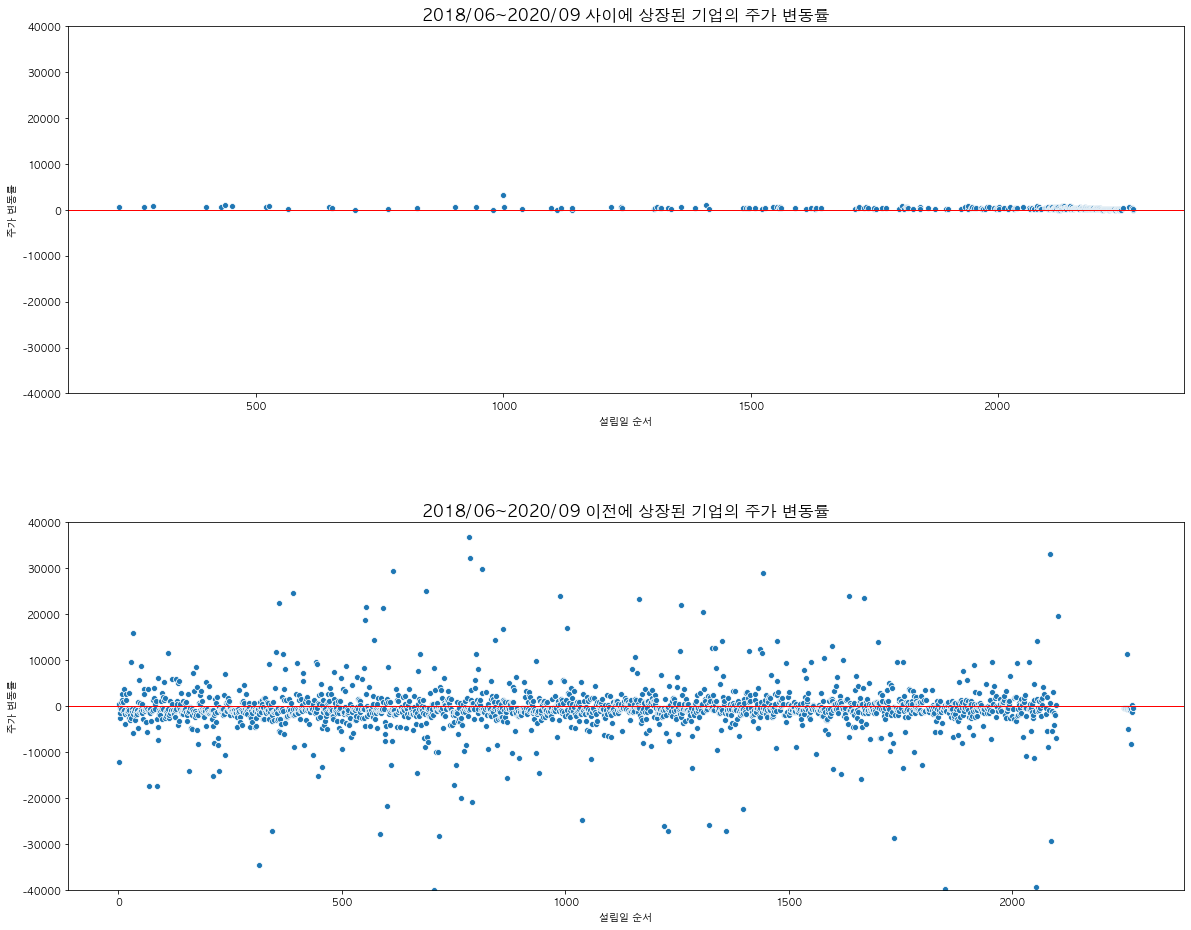

In [11]:
fig = plt.figure(figsize=(20,15))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)

sns.scatterplot(x='built_order', y='diff_rate', data=data_during, ax=ax1)
ax1.set_title('2018/06~2020/09 사이에 상장된 기업의 주가 변동률', fontsize=16)
ax1.set(xlabel='설립일 순서', ylabel='주가 변동률')
ax1.axhline(y=0, color='r', linewidth=1)
ax1.set(ylim=(-40000,40000))

sns.scatterplot(x='built_order', y='diff_rate', data=data_before, ax=ax2)
ax2.set_title('2018/06~2020/09 이전에 상장된 기업의 주가 변동률', fontsize=16)
ax2.set(xlabel='설립일 순서', ylabel='주가 변동률')
ax2.axhline(y=0, color='r', linewidth=1)
ax2.set(ylim=(-40000,40000))

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

In [12]:
# sns.distplot(data_during.diff_rate)

In [13]:
# sns.distplot(data_before.diff_rate)

상장일자별로 주가변동률을 시각화해본 결과 '이전에 상장된 기업들(이하 이전상장기업)'이 테이블 기간 내 상장된 기업들(이하 이후상장기업)'에 비해 상대적으로 덜안정되어 보인다. 또한 이전상장기업들 간에도 차이가 존재하는 듯 하다. **그렇다면 정말로 상장된 날짜가 이런 차이를 가져오는걸까?** 검정이 필요한 부분이 생겼다! 

### 2.2.3 보통주/ 우선주 여부
보통주만 존재하므로 보통주/우선주는 고려할 필요성이 없어 보인다. 

In [14]:
i=0

#상장코드의 마지막 부분이 숫자 0이면 0, 아니면 i를 하나씩 증가. 
#만약 i가 0이면 모두 보통주라는 의미 
for s in data['Symbol'] : 
    if s[-1] == '0' : 
        i=0
    else :
        i+=1
print(i)

0


### 데이터를 살펴본 결과 다음과 같은 가설을 세우고 검정해보고자 한다 :
>**_오래 전부터 상장된 기업과 최근 상장된 기업 사이에 주가 변동률 평균 차이가 있을 것이다_**

## 3. 실험 진행  
  
  ### 3.1 t-test 가능 여부 확인하기 - 정규성 검정 
독립된 두 집단 간 평균 차이에 대한 가설이므로 집단 분석을 시행하기로 하고 그 전에 주가 변동률(diff_rate)에 대해 Shapiro-Wilk test로 정규성을 검정한다. 이 때 귀무가설은 _"정규성을 만족한다"_ 이다.  

- 첫 번째 시행 결과 p-value <0.05 으로 정규성을 만족하지 않는 것으로 나타났다.  
- diff_rate의 그래프를 그려본 결과 첨도가 높았는데, 이를 로그를 취해 어느 정도 정규 분포 형태로 변환해 주고 다시 정규성 검정을 하기로 했다.  
- 주가 변동률에 음수가 있기 때문에 이를 모두 절댓값을 취해 양수로 만들어 주었다. 이렇게 절댓값을 취해도 무방하다고 판단한 근거는 결국 주가 변동률은 (-), (+) 보다는 얼마나 변동 없이 일관적인가를 판단하는 지표이기 때문이다. 
- 시행 결과 p-value < 0.05 이므로 이번에도 정규성을 만족하지 않았다. 
- 따라서 비모수 검정을 실시하기로 했다. 

In [15]:
from scipy import stats
stats.shapiro(data.diff_rate)

ShapiroResult(statistic=0.21322762966156006, pvalue=0.0)

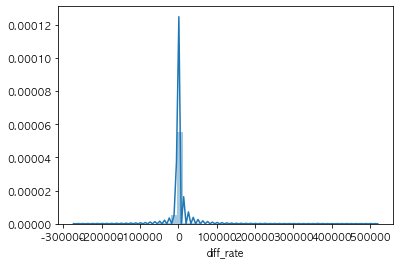

In [16]:
sns.distplot(data.diff_rate)

In [17]:
import numpy as np 
#주가 변동률의 음수를 모두 절댓값을 취해 양수로 만들어주고 로그변환을 실시 
data['abs_diff_rate']=np.log1p(data['diff_rate'].abs())

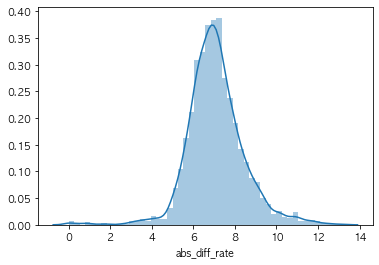

In [18]:
sns.distplot(data['abs_diff_rate'])

In [19]:
stats.shapiro(data.abs_diff_rate)

ShapiroResult(statistic=0.9505215287208557, pvalue=4.821040607270605e-27)

### 3.2 비모수 검정 - Mann Whitney U Test  

_귀무가설 : '이전상장기업과 이후상장기업의 주가변동률 평균 차이가 없을 것이다'_  
  
맨휘트니 검정 결과 pvalue < 0.05로 귀무가설을 기각한다.  
**따라서 두 집단 간 주가 변동률 평균에는 유의한 차이가 있다고 결론 내릴 수 있다.**

In [20]:
# 이전상장기업 vs. 이후상장기업 나누기 
data_A = data_during['diff_rate']
data_B = data_before['diff_rate']


#비모수 검정 - 맨휘트니 
#귀무가설 : 이전상장기업의 주가변동률과 이후상장기업의 주가변동률 간의 차이가 없을 것이다. 
#pvalue < 0.05. 따라서 귀무가설을 기각한다. 
#두 집단간 차이가 있다! 

stats.mannwhitneyu(data_A, data_B, use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=174783.0, pvalue=6.941500669860956e-24)

--------------------------------------------------------------------------------------------------------------
  
 
## 4. 결론   
- 본 실험에서는 어떤 주식을 매수해야할까라는 고민해서 출발하였다.  
- 고민끝에(?) 주가변동률을 기준으로 주식을 매수해야겠다는 생각에 기업들의 주가변동률을 보기로 결정, 
- 주어진 데이터는 상장단축코드와 날짜별 주식가격이었고, 이를 기반으로 기업별 주가변동률을 도출하였다.  
- 시각화를 통해 살펴본 결과 상장이 오래전에 이루어진 기업과, 데이터에 명시된 날짜 중 어느 한 날에 상장된 기업간 주가 변동률에 차이가 있어 보였다.  
- 따라서 주가 변동률과 관련하여 다음의 가설을 세워보고 이를 검정해보기로 했다  :  
>_상장일을 기준으로 2018년 6월 이전에 상장된 기업과 2018년 6월~2020년 9월 사이에 상장된 기업 사이에 주가 변동률 평균 차이가 있을 것이다._  
  
**- 비모수적 검정으로 집단간 차이 검정을 해 본 결과 두 집단간에 주가변동률은 통계적으로 유의한 차이가 있는 것으로 보였다.**  
- 따라서 주가변동률을 기준으로 주식을 매수할꺼면 비교적 최근에 상장된 기업을 고려해보는 것도 나쁘지 않을 것 같다!  